In [48]:
# se cargan las liberias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from pandas_profiling import ProfileReport
from pathlib import Path

In [54]:
ds_path= Path("../Datasets")       #Nombre de la carpeta donde se encuentran los archivos de los Datasets

def leerCSV_y_concatClient_o_Sucur(csv):
    df_list= []
    for file in ds_path.glob(f'{csv}*.csv'):
        print(file)
        df = pd.read_csv(file, delimiter = ';', decimal=",", encoding = "utf-8")
        df_list.append(df)
    return pd.concat((df_list), ignore_index=True, sort=False)

def leerCSV_y_concat(csv):
    df_list= []
    for file in ds_path.glob(f'{csv}*.csv'):
        print(file)
        df = pd.read_csv(file, delimiter = ',',  encoding = "utf-8")
        df_list.append(df)
    return pd.concat((df_list), ignore_index=True, sort=False)

def leerCSV_y_concatProveedor(csv):
    df_list= []
    for file in ds_path.glob(f'{csv}*.csv'):
        print(file)
        df = pd.read_csv(file, delimiter = ',',  encoding = "latin-1")
        df_list.append(df)
    return pd.concat((df_list), ignore_index=True, sort=False)

def leerCSV_y_concatCanalVenta(csv):
    df_list= []
    for file in ds_path.glob(f'{csv}*.xlsx'):
        print(file)
        df = pd.read_excel(file)
        df_list.append(df)
    return pd.concat((df_list), ignore_index=True, sort=False)


In [55]:
# Se genera dataframes a partir de los archivos de la carpeta Datasets
df_clientes= leerCSV_y_concatClient_o_Sucur('Clien')
df_compra=leerCSV_y_concat('Compr')
df_gasto=leerCSV_y_concat('Gasto')
df_localidades= leerCSV_y_concat('Local')
df_proveedores= leerCSV_y_concatProveedor('Provee')
df_sucursales= leerCSV_y_concatClient_o_Sucur('Sucur')
df_ventas= leerCSV_y_concat('Vent')
df_tipoGasto = leerCSV_y_concat('TiposDeGas')
df_canalVenta=leerCSV_y_concatCanalVenta('Canal')


../Datasets/Clientes_Dic2020.csv
../Datasets/Clientes.csv
../Datasets/Compra.csv
../Datasets/Gasto.csv
../Datasets/Localidades.csv
../Datasets/Proveedores.csv
../Datasets/Sucursales.csv
../Datasets/Venta.csv
../Datasets/Venta_Dic2020.csv
../Datasets/TiposDeGasto.csv
../Datasets/CanalDeVenta.xlsx


Se vsualiza cada uno de los Datasets

In [72]:
df_clientes.head(5)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,22,Buenos Aires,LUISA ANTONIA SCELZA,AVDA. EVA PERON 2352,4697-7045,30,MORON,-58.631154,-34.674626,NaN
1,59,Buenos Aires,JUAN SILVA,AV.RIVADAVIA E/ MITRE Y SARMIENTO 373,4257-5719,46,QUILMES,-58.254033,-34.720609,NaN
2,66,Buenos Aires,JULIO CESAR SILVEIRA,MORENO E/ BRANDSEN Y MATIENZO 932,4257-5728,56,QUILMES,-58.254347,-34.727616,NaN
3,67,Buenos Aires,JORGE ALEJANDRO SILVEIRA,HUMBERTO PRIMO E/E.ZOLA Y MOZART 887 VILLA LUJAN,4254-1576,20,QUILMES,-58.242736,-34.717788,NaN
4,76,Buenos Aires,ALEJANDRO PABLO SILVERA,ORTIZ DE OCAMPO E/MITRE Y ALVEAR 335,4253-2092,29,QUILMES,58.249987,34.727147,NaN


In [73]:
df_compra.head(5)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [74]:
df_gasto.head(5)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.90
1,2,18,2,2015-01-01,317.02
2,3,18,3,2015-01-01,118.89
3,4,18,4,2015-01-01,1174.23
4,5,1,1,2015-01-01,1104.51


In [75]:
df_localidades.head(5)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.280620,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires
1,Localidad simple,-34.868119,-60.393971,6021.0,Alberti,INDEC,6021020000,6021020,Coronel Seguí,60021.0,Alberti,CORONEL SEGUI,6,Buenos Aires
2,Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
3,Localidad simple,-35.124382,-60.220061,6021.0,Alberti,INDEC,6021040000,6021040,Pla,60021.0,Alberti,PLA,6,Buenos Aires
4,Localidad simple,-35.109618,-60.070551,6021.0,Alberti,INDEC,6021050000,6021050,Villa Grisolía,60021.0,Alberti,VILLA GRISOLIA,6,Buenos Aires


In [76]:
df_proveedores.head(5)

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
1,2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
3,4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA


In [77]:
df_sucursales.head(5)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,-34.567806,-58.449572
1,2,Palermo 1,Guatemala 5701,CABA,CABA,-34.579035,-58.433566
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,-34.595966,-58.405150
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,-34.604685,-58.398764
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,-34.617308,-58.416179


In [69]:
df_tipoGasto.head()

,IdTipoGasto,Descripcion,Monto_Aproximado
0,1,Alquiler,1000
1,2,Servicios,300
2,3,Impuestos,100
3,4,Sueldos y Jornales,1000


In [79]:
df_canalVenta.head(5)

,CODIGO,DESCRIPCION
0,1,Telefónica
1,2,OnLine
2,3,Presencial


In [78]:
df_ventas.head(5)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


# Se elaboran los reportes iniciales en html usando Profile-Reportng

In [25]:
# Elaborando Reporte inicial  Cliente
prof_Cliente = ProfileReport(df_clientes)
prof_Cliente.to_file(output_file='Profile_Inicial_Cliente.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
# Elaborando Reporte inicial  Compra
prof_Compra = ProfileReport(df_compra)
prof_Compra.to_file(output_file='Profile_Inicial_Compra.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# Elaborando Reporte inicial  Gasto
prof_Gasto = ProfileReport(df_gasto)
prof_Gasto.to_file(output_file='Profile_Inicial_Gasto.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# Elaborando Reporte inicial  Localidad
prof_Localidad = ProfileReport(df_localidades)
prof_Localidad.to_file(output_file='Profile_Inicial_Localidad.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
# Elaborando Reporte inicial  Proveedor
prof_Proveedor = ProfileReport(df_proveedores)
prof_Proveedor.to_file(output_file='Profile_Inicial_Proveedor.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# Elaborando Reporte inicial  Sucursal
prof_Sucursal = ProfileReport(df_sucursales)
prof_Sucursal.to_file(output_file='Profile_Inicial_Sucursal.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# Elaborando Reporte inicial Venta
prof_Venta = ProfileReport(df_ventas)
prof_Venta.to_file(output_file='Profile_Inicial_Venta.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# Elaborando Reporte inicial Canal de Venta
prof_CanalVenta = ProfileReport(df_canalVenta)
prof_CanalVenta.to_file(output_file='Profile_Inicial_CanalVenta.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
# Elaborando Reporte inicial Tipos de Gasto
prof_TipoGasto = ProfileReport(df_tipoGasto)
prof_TipoGasto.to_file(output_file='Profile_Inicial_TipoGasto.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Elaborando Reporte inicial Venta
prof_Venta = ProfileReport(df_ventas)
prof_Venta.to_file(output_file='Profile_Inicial_Venta.html')

# Deteccion de outliers y graficas que representan la calidad de los datos

In [92]:
# Analsis de los datos por columna de los datasets
def analisis_ds(df, nombre):
    for column in df:
        
        if df[column].dtype == 'O':    
            valores_faltantes = round((df[column].isnull().sum() * 100) / df.shape[0],2 )     ## Para calcular porcentaje de valores faltamtes
            sin_errores = round(100 - valores_faltantes,2)                                ## Para calcular porcentaje de valores sin error
            outliers = 0
        else:
            min = df[column].mean() - 3*df[column].std()          ## valor minimo para calcular el outlier
            max = df[column].mean() + 3*df[column].std()          ## valor máximo para calcular el outlier
            #Se usara la regla de 3 sigma
            outliers =  round((((len(df[column][df[column] < min]) + len(df[column][df[column] > max]))) * 100) / df.shape[0],2)   
            valores_faltantes = round((df[column].isnull().sum() * 100) / df.shape[0],2)     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = round(100 - valores_faltantes - outliers,2)

        lista = [outliers,valores_faltantes,sin_errores]    

        ##   Graficando 
        plt.figure(figsize=(10,10))
        plt.title(f"Dataset {nombre}: Calidad de datos de columna '{column}'")
        graph = plt.bar(['outliers','valores_faltantes','sin_errores'],lista)
        i = 0
        for p in graph:           
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                y+height*1.01,
                str(lista[i])+'%',
                ha='center',
                weight='bold')
            i+=1
        
        plt.show()
        
        print('---------------------------------------------------')
        print('El porcentaje de valores faltantes en la columna',column,'es :',valores_faltantes,'%')
        print('El porcentaje de outliers en la columna',column,'es :',outliers,'%')
        print('El porcentaje de valores sin error en la columna',column,'es :',sin_errores,'%')
        print('---------------------------------------------------')

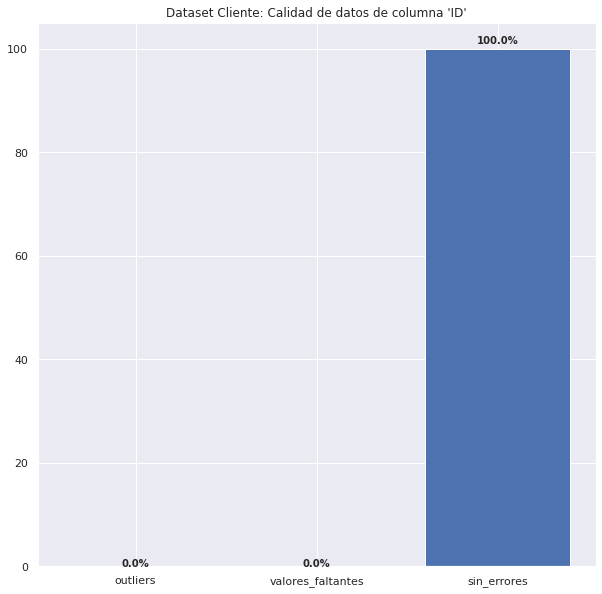

---------------------------------------------------
El porcentaje de valores faltantes en la columna ID es : 0.0 %
El porcentaje de outliers en la columna ID es : 0.0 %
El porcentaje de valores sin error en la columna ID es : 100.0 %
---------------------------------------------------


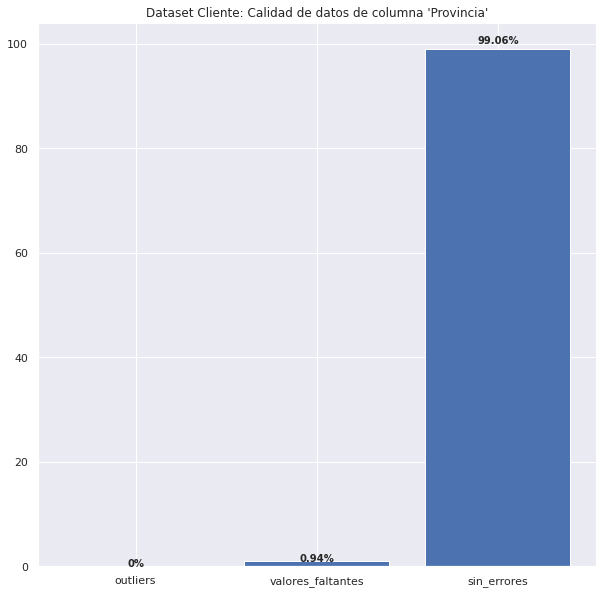

---------------------------------------------------
El porcentaje de valores faltantes en la columna Provincia es : 0.94 %
El porcentaje de outliers en la columna Provincia es : 0 %
El porcentaje de valores sin error en la columna Provincia es : 99.06 %
---------------------------------------------------


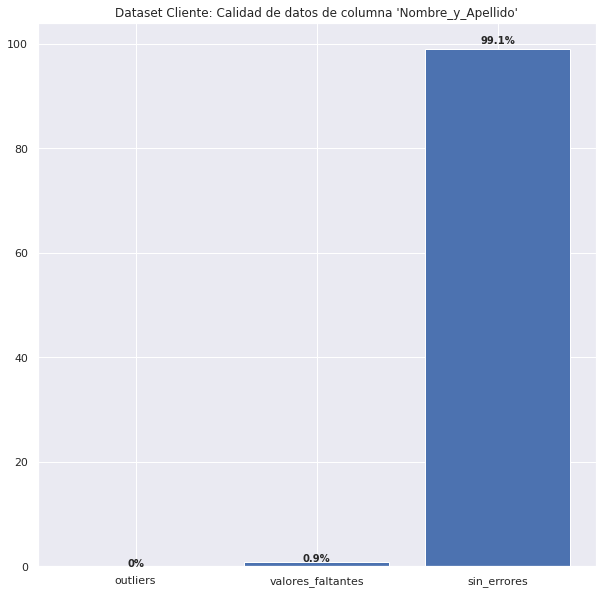

---------------------------------------------------
El porcentaje de valores faltantes en la columna Nombre_y_Apellido es : 0.9 %
El porcentaje de outliers en la columna Nombre_y_Apellido es : 0 %
El porcentaje de valores sin error en la columna Nombre_y_Apellido es : 99.1 %
---------------------------------------------------


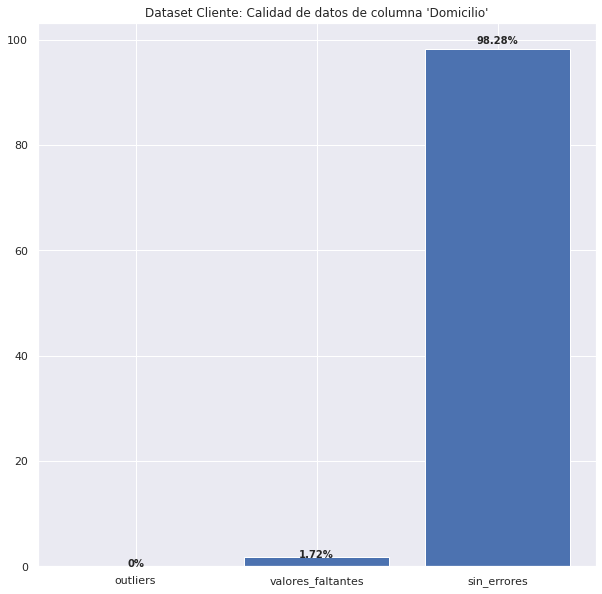

---------------------------------------------------
El porcentaje de valores faltantes en la columna Domicilio es : 1.72 %
El porcentaje de outliers en la columna Domicilio es : 0 %
El porcentaje de valores sin error en la columna Domicilio es : 98.28 %
---------------------------------------------------


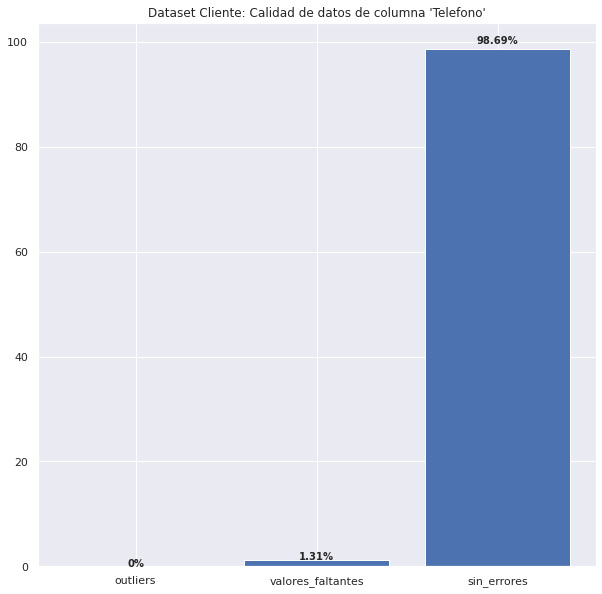

---------------------------------------------------
El porcentaje de valores faltantes en la columna Telefono es : 1.31 %
El porcentaje de outliers en la columna Telefono es : 0 %
El porcentaje de valores sin error en la columna Telefono es : 98.69 %
---------------------------------------------------


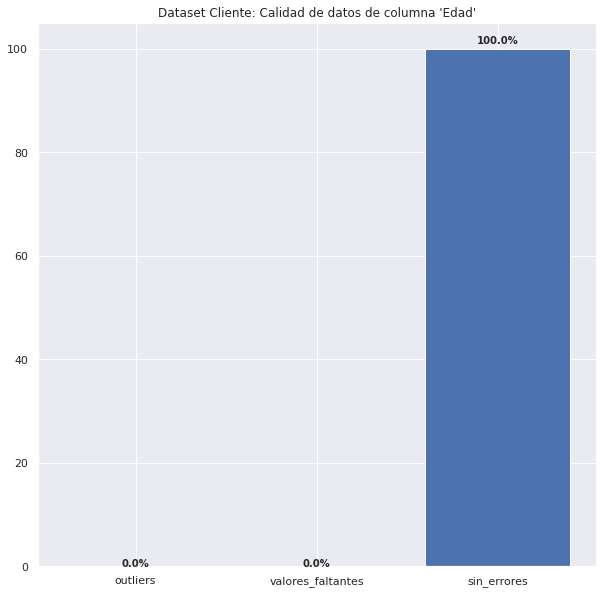

---------------------------------------------------
El porcentaje de valores faltantes en la columna Edad es : 0.0 %
El porcentaje de outliers en la columna Edad es : 0.0 %
El porcentaje de valores sin error en la columna Edad es : 100.0 %
---------------------------------------------------


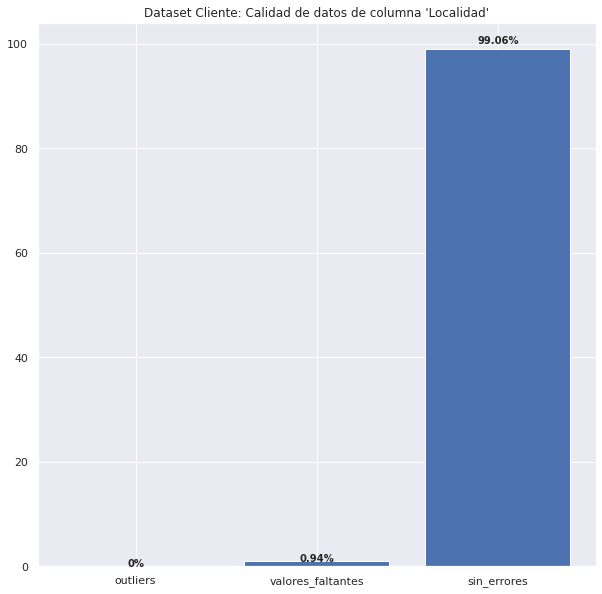

---------------------------------------------------
El porcentaje de valores faltantes en la columna Localidad es : 0.94 %
El porcentaje de outliers en la columna Localidad es : 0 %
El porcentaje de valores sin error en la columna Localidad es : 99.06 %
---------------------------------------------------


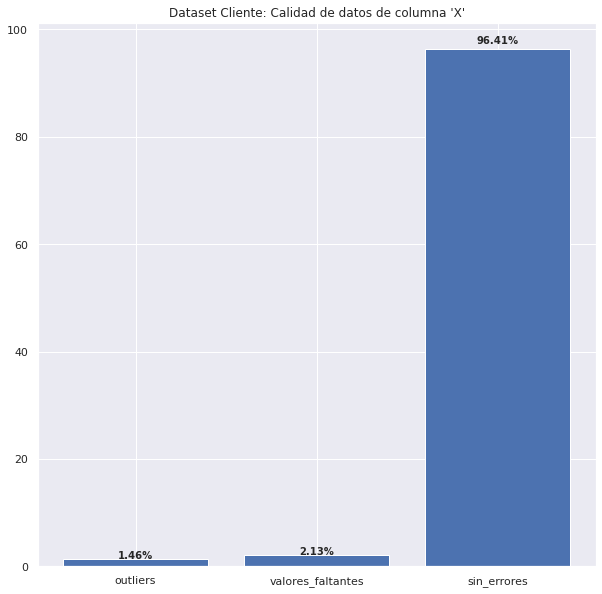

---------------------------------------------------
El porcentaje de valores faltantes en la columna X es : 2.13 %
El porcentaje de outliers en la columna X es : 1.46 %
El porcentaje de valores sin error en la columna X es : 96.41 %
---------------------------------------------------


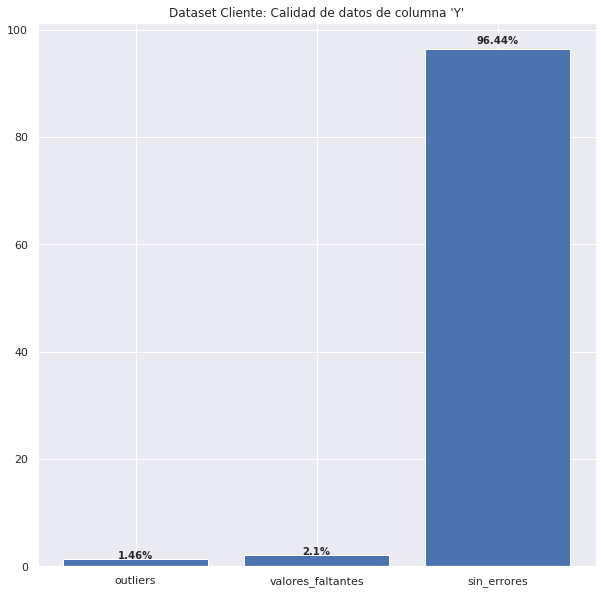

---------------------------------------------------
El porcentaje de valores faltantes en la columna Y es : 2.1 %
El porcentaje de outliers en la columna Y es : 1.46 %
El porcentaje de valores sin error en la columna Y es : 96.44 %
---------------------------------------------------


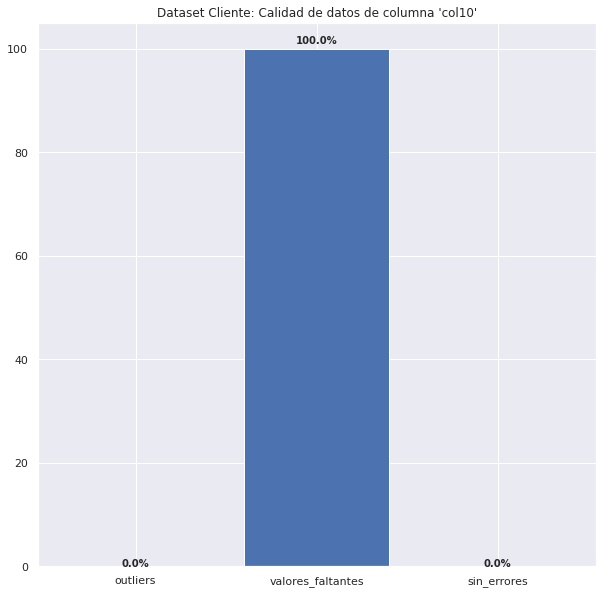

---------------------------------------------------
El porcentaje de valores faltantes en la columna col10 es : 100.0 %
El porcentaje de outliers en la columna col10 es : 0.0 %
El porcentaje de valores sin error en la columna col10 es : 0.0 %
---------------------------------------------------


In [91]:
analisis_ds(df_clientes,'Cliente')

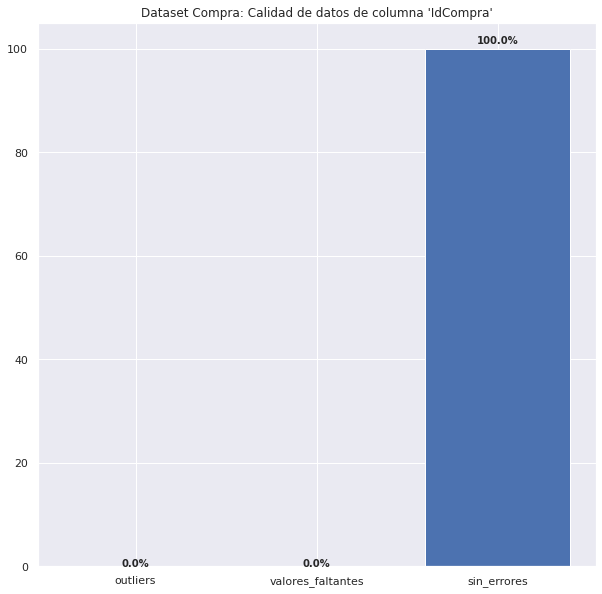

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdCompra es : 0.0 %
El porcentaje de outliers en la columna IdCompra es : 0.0 %
El porcentaje de valores sin error en la columna IdCompra es : 100.0 %
---------------------------------------------------


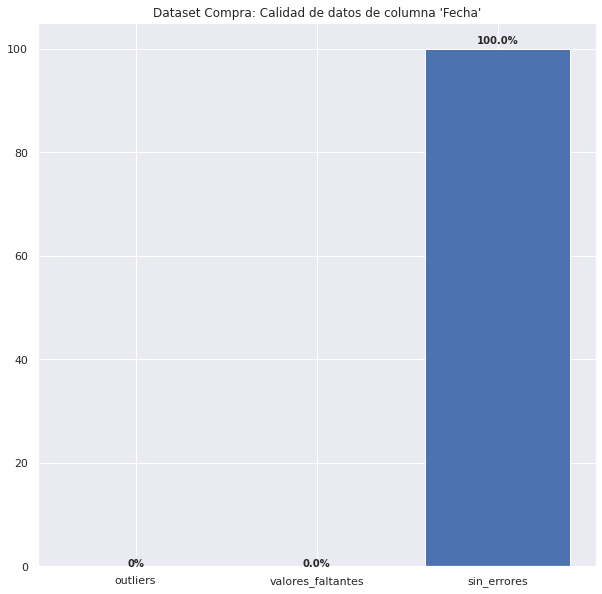

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha es : 0.0 %
El porcentaje de outliers en la columna Fecha es : 0 %
El porcentaje de valores sin error en la columna Fecha es : 100.0 %
---------------------------------------------------


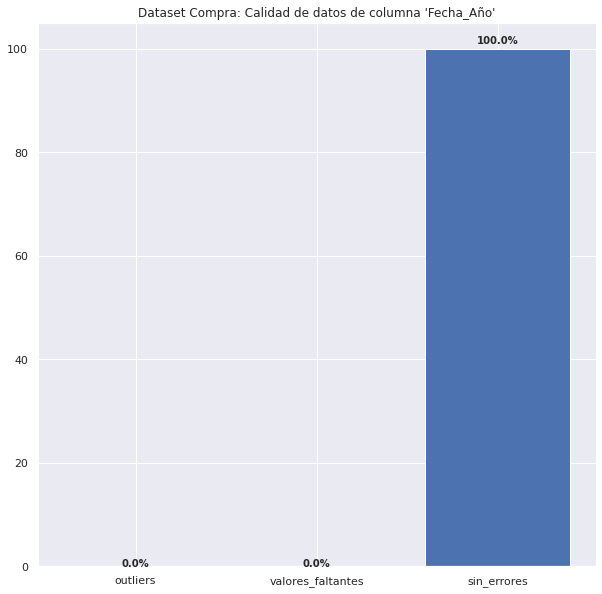

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha_Año es : 0.0 %
El porcentaje de outliers en la columna Fecha_Año es : 0.0 %
El porcentaje de valores sin error en la columna Fecha_Año es : 100.0 %
---------------------------------------------------


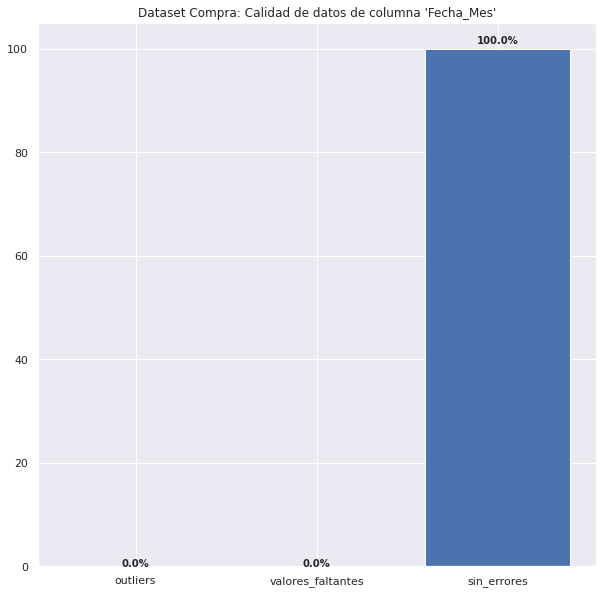

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha_Mes es : 0.0 %
El porcentaje de outliers en la columna Fecha_Mes es : 0.0 %
El porcentaje de valores sin error en la columna Fecha_Mes es : 100.0 %
---------------------------------------------------


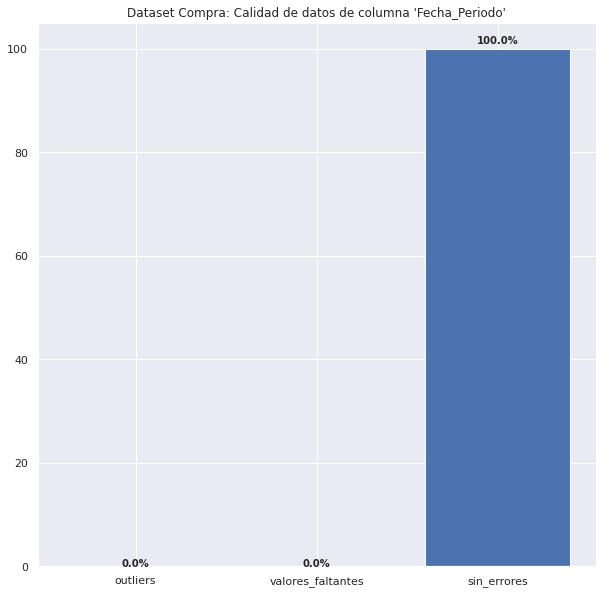

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha_Periodo es : 0.0 %
El porcentaje de outliers en la columna Fecha_Periodo es : 0.0 %
El porcentaje de valores sin error en la columna Fecha_Periodo es : 100.0 %
---------------------------------------------------


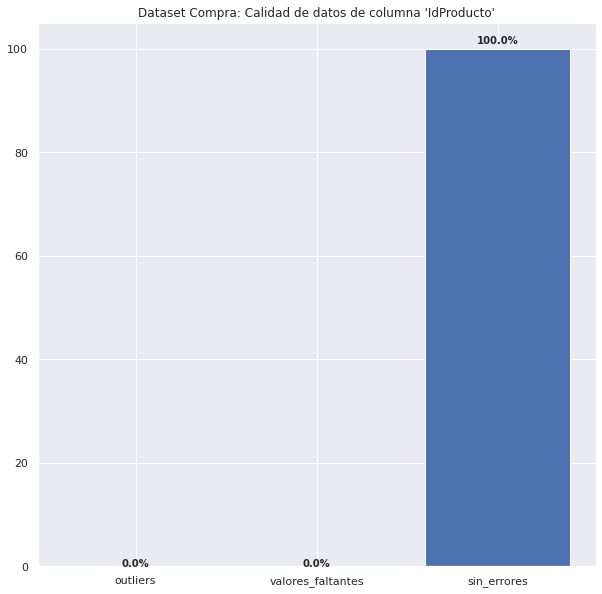

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdProducto es : 0.0 %
El porcentaje de outliers en la columna IdProducto es : 0.0 %
El porcentaje de valores sin error en la columna IdProducto es : 100.0 %
---------------------------------------------------


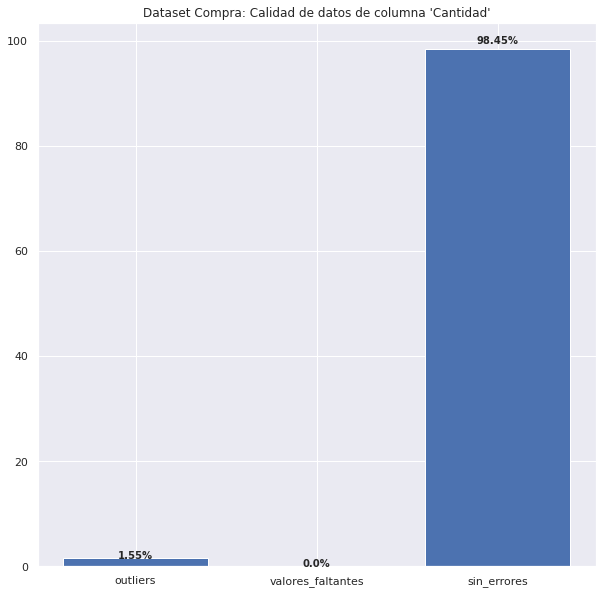

---------------------------------------------------
El porcentaje de valores faltantes en la columna Cantidad es : 0.0 %
El porcentaje de outliers en la columna Cantidad es : 1.55 %
El porcentaje de valores sin error en la columna Cantidad es : 98.45 %
---------------------------------------------------


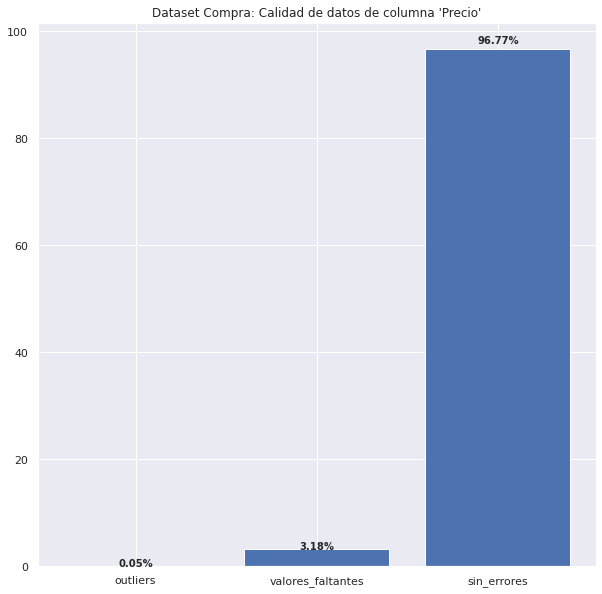

---------------------------------------------------
El porcentaje de valores faltantes en la columna Precio es : 3.18 %
El porcentaje de outliers en la columna Precio es : 0.05 %
El porcentaje de valores sin error en la columna Precio es : 96.77 %
---------------------------------------------------


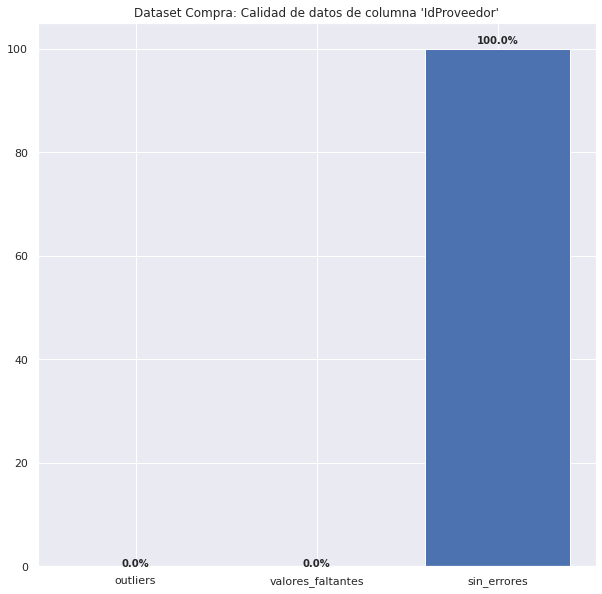

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdProveedor es : 0.0 %
El porcentaje de outliers en la columna IdProveedor es : 0.0 %
El porcentaje de valores sin error en la columna IdProveedor es : 100.0 %
---------------------------------------------------


In [93]:
analisis_ds(df_compra,'Compra')

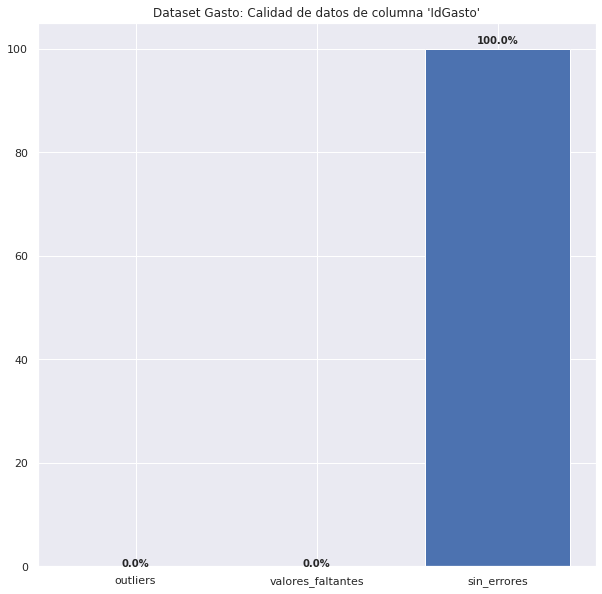

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdGasto es : 0.0 %
El porcentaje de outliers en la columna IdGasto es : 0.0 %
El porcentaje de valores sin error en la columna IdGasto es : 100.0 %
---------------------------------------------------


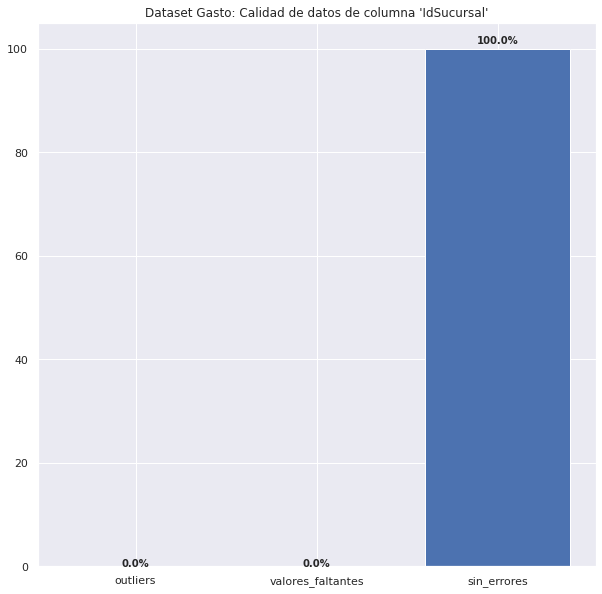

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdSucursal es : 0.0 %
El porcentaje de outliers en la columna IdSucursal es : 0.0 %
El porcentaje de valores sin error en la columna IdSucursal es : 100.0 %
---------------------------------------------------


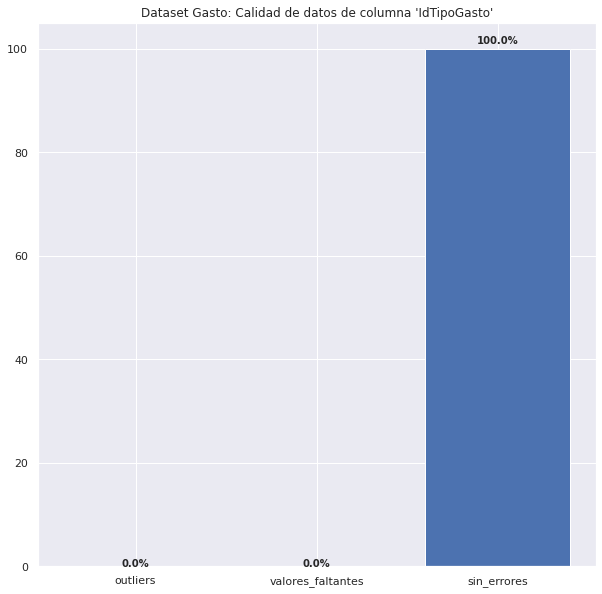

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdTipoGasto es : 0.0 %
El porcentaje de outliers en la columna IdTipoGasto es : 0.0 %
El porcentaje de valores sin error en la columna IdTipoGasto es : 100.0 %
---------------------------------------------------


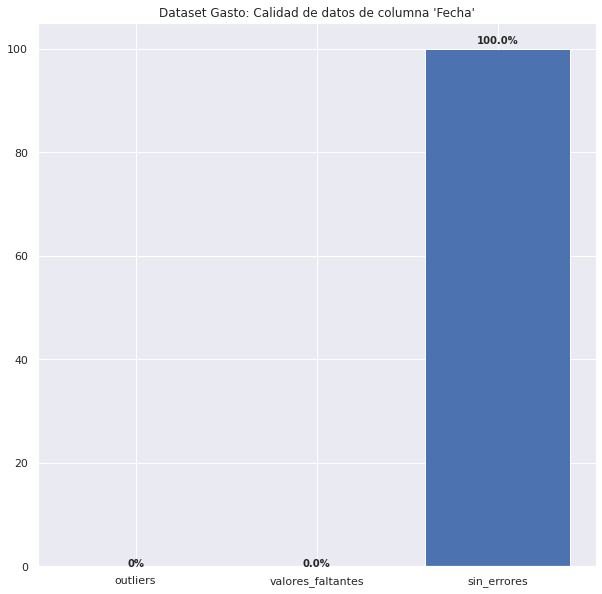

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha es : 0.0 %
El porcentaje de outliers en la columna Fecha es : 0 %
El porcentaje de valores sin error en la columna Fecha es : 100.0 %
---------------------------------------------------


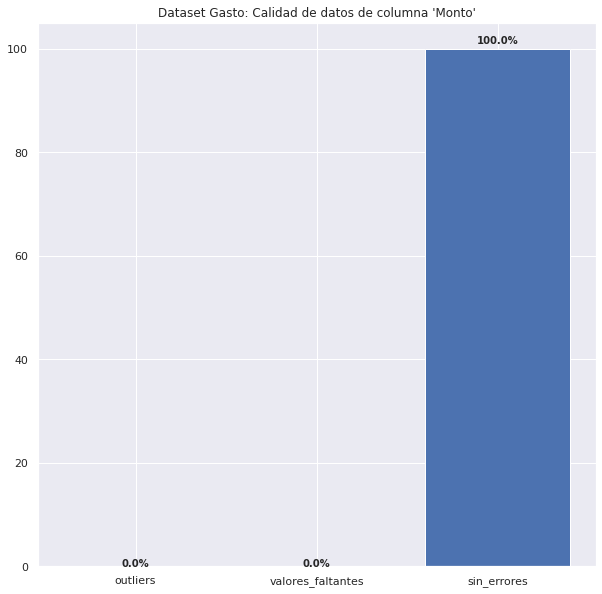

---------------------------------------------------
El porcentaje de valores faltantes en la columna Monto es : 0.0 %
El porcentaje de outliers en la columna Monto es : 0.0 %
El porcentaje de valores sin error en la columna Monto es : 100.0 %
---------------------------------------------------


In [94]:
analisis_ds(df_gasto,'Gasto')

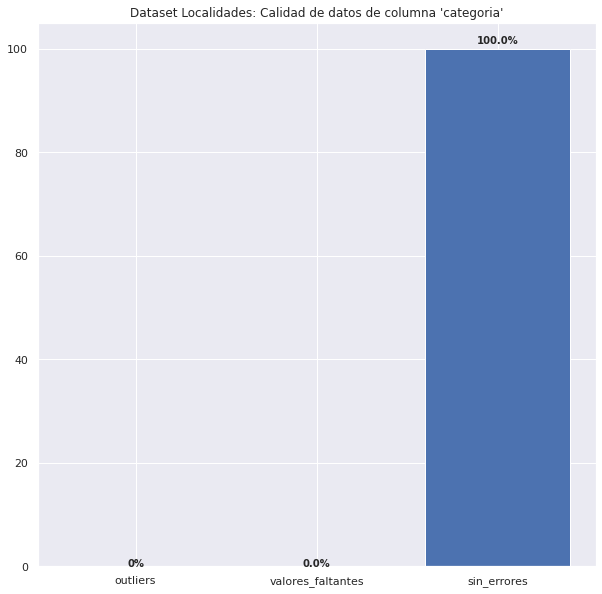

---------------------------------------------------
El porcentaje de valores faltantes en la columna categoria es : 0.0 %
El porcentaje de outliers en la columna categoria es : 0 %
El porcentaje de valores sin error en la columna categoria es : 100.0 %
---------------------------------------------------


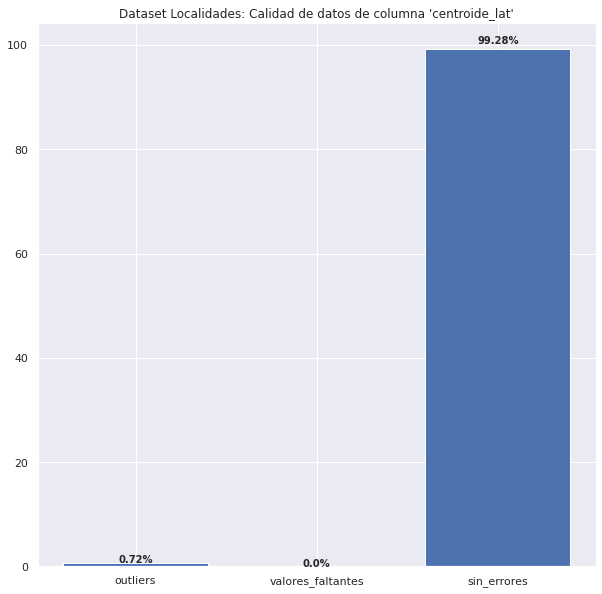

---------------------------------------------------
El porcentaje de valores faltantes en la columna centroide_lat es : 0.0 %
El porcentaje de outliers en la columna centroide_lat es : 0.72 %
El porcentaje de valores sin error en la columna centroide_lat es : 99.28 %
---------------------------------------------------


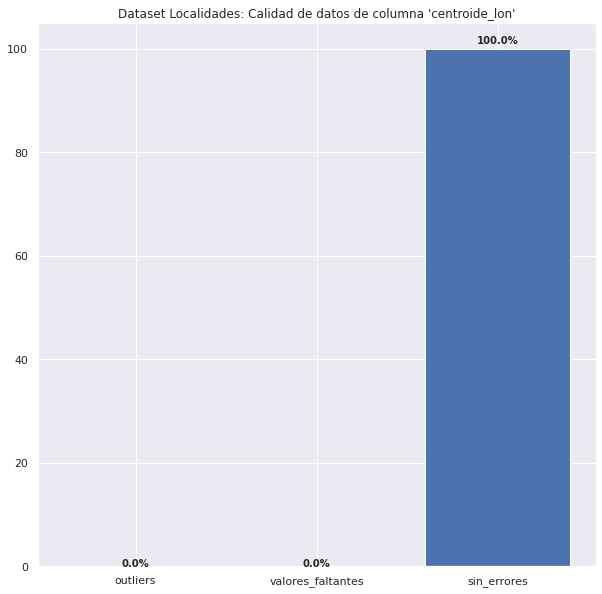

---------------------------------------------------
El porcentaje de valores faltantes en la columna centroide_lon es : 0.0 %
El porcentaje de outliers en la columna centroide_lon es : 0.0 %
El porcentaje de valores sin error en la columna centroide_lon es : 100.0 %
---------------------------------------------------


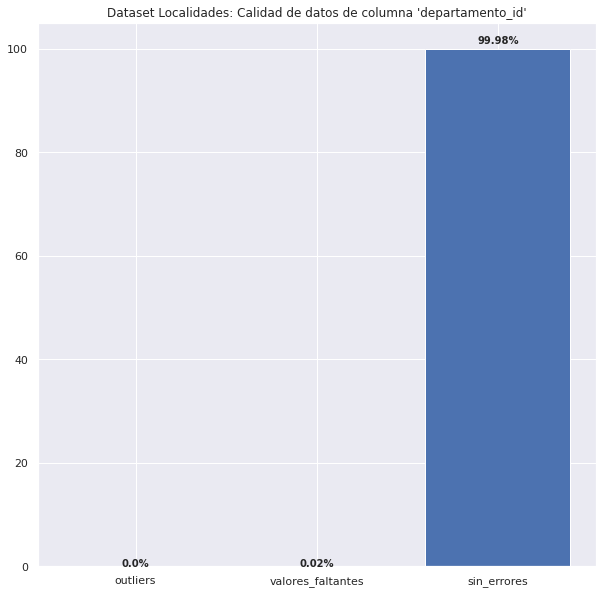

---------------------------------------------------
El porcentaje de valores faltantes en la columna departamento_id es : 0.02 %
El porcentaje de outliers en la columna departamento_id es : 0.0 %
El porcentaje de valores sin error en la columna departamento_id es : 99.98 %
---------------------------------------------------


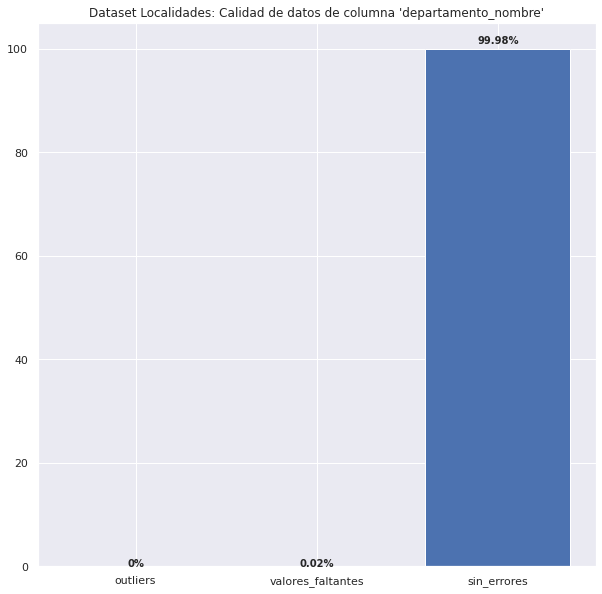

---------------------------------------------------
El porcentaje de valores faltantes en la columna departamento_nombre es : 0.02 %
El porcentaje de outliers en la columna departamento_nombre es : 0 %
El porcentaje de valores sin error en la columna departamento_nombre es : 99.98 %
---------------------------------------------------


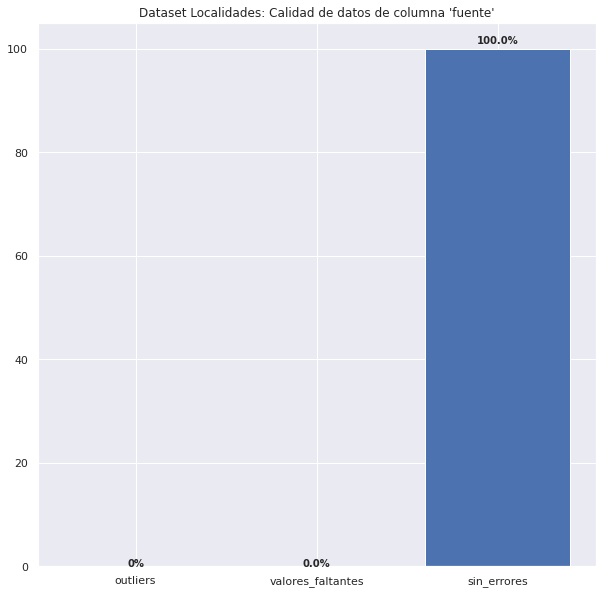

---------------------------------------------------
El porcentaje de valores faltantes en la columna fuente es : 0.0 %
El porcentaje de outliers en la columna fuente es : 0 %
El porcentaje de valores sin error en la columna fuente es : 100.0 %
---------------------------------------------------


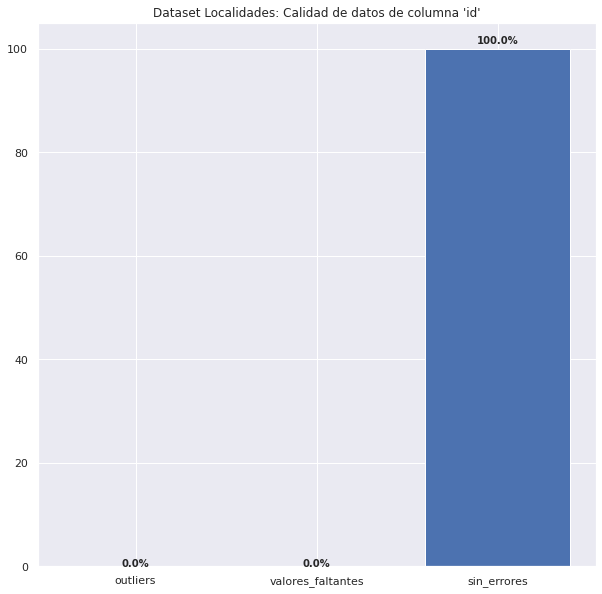

---------------------------------------------------
El porcentaje de valores faltantes en la columna id es : 0.0 %
El porcentaje de outliers en la columna id es : 0.0 %
El porcentaje de valores sin error en la columna id es : 100.0 %
---------------------------------------------------


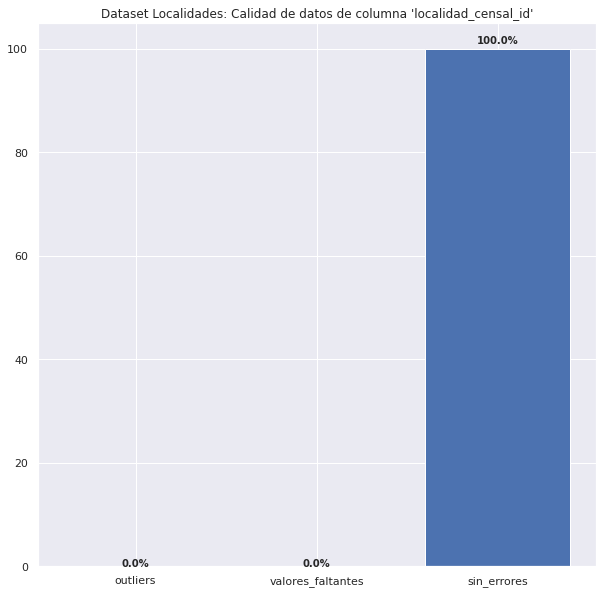

---------------------------------------------------
El porcentaje de valores faltantes en la columna localidad_censal_id es : 0.0 %
El porcentaje de outliers en la columna localidad_censal_id es : 0.0 %
El porcentaje de valores sin error en la columna localidad_censal_id es : 100.0 %
---------------------------------------------------


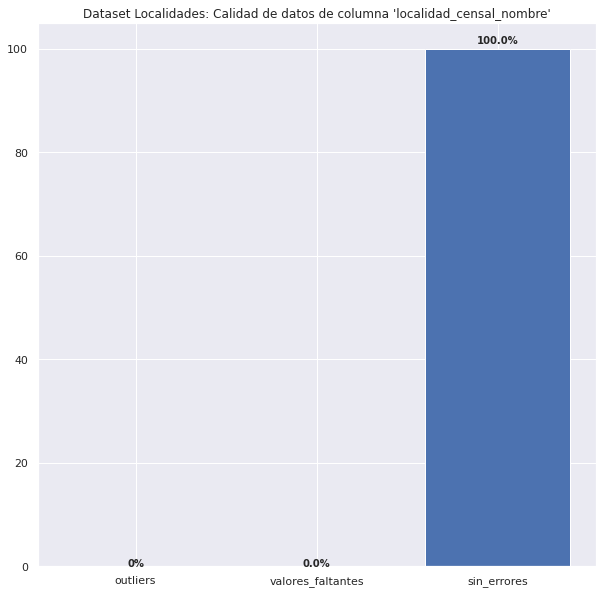

---------------------------------------------------
El porcentaje de valores faltantes en la columna localidad_censal_nombre es : 0.0 %
El porcentaje de outliers en la columna localidad_censal_nombre es : 0 %
El porcentaje de valores sin error en la columna localidad_censal_nombre es : 100.0 %
---------------------------------------------------


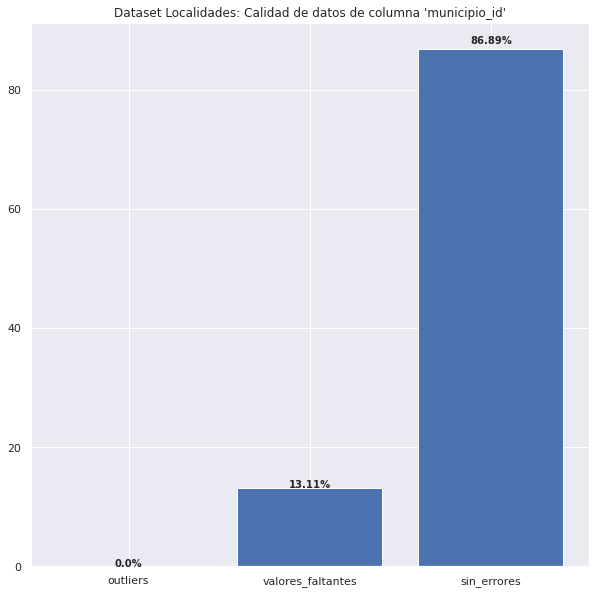

---------------------------------------------------
El porcentaje de valores faltantes en la columna municipio_id es : 13.11 %
El porcentaje de outliers en la columna municipio_id es : 0.0 %
El porcentaje de valores sin error en la columna municipio_id es : 86.89 %
---------------------------------------------------


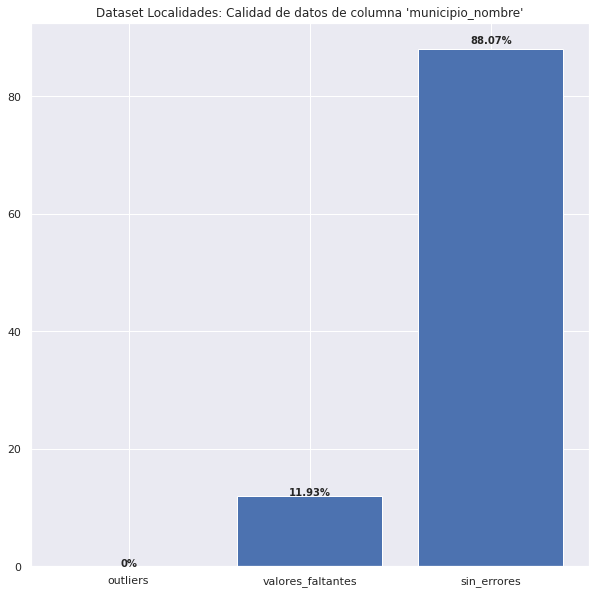

---------------------------------------------------
El porcentaje de valores faltantes en la columna municipio_nombre es : 11.93 %
El porcentaje de outliers en la columna municipio_nombre es : 0 %
El porcentaje de valores sin error en la columna municipio_nombre es : 88.07 %
---------------------------------------------------


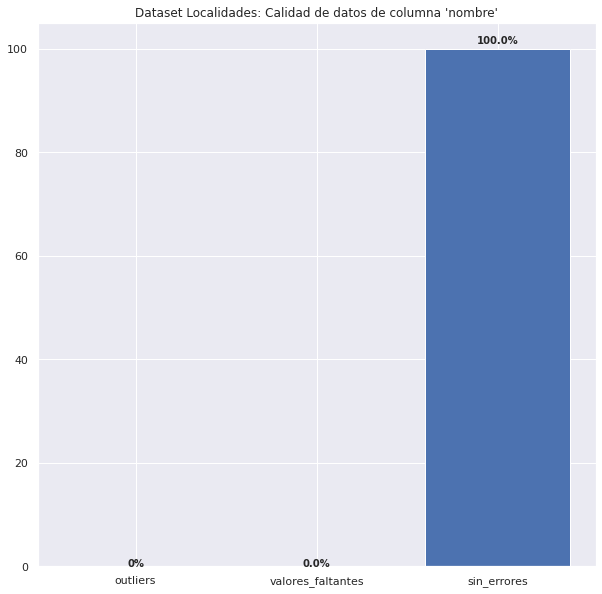

---------------------------------------------------
El porcentaje de valores faltantes en la columna nombre es : 0.0 %
El porcentaje de outliers en la columna nombre es : 0 %
El porcentaje de valores sin error en la columna nombre es : 100.0 %
---------------------------------------------------


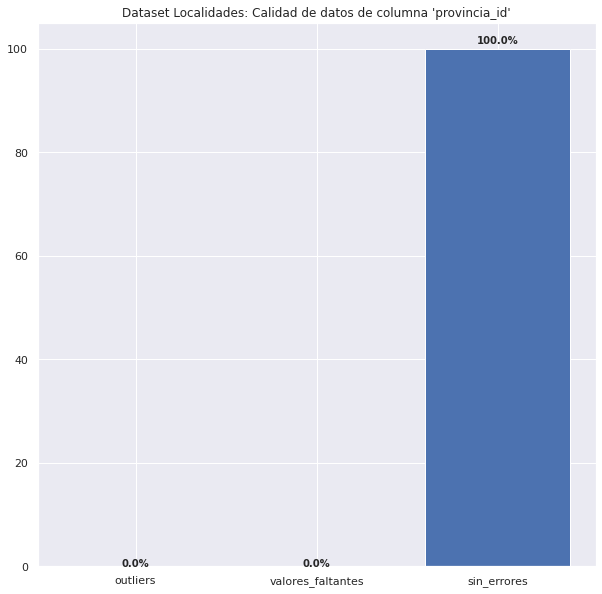

---------------------------------------------------
El porcentaje de valores faltantes en la columna provincia_id es : 0.0 %
El porcentaje de outliers en la columna provincia_id es : 0.0 %
El porcentaje de valores sin error en la columna provincia_id es : 100.0 %
---------------------------------------------------


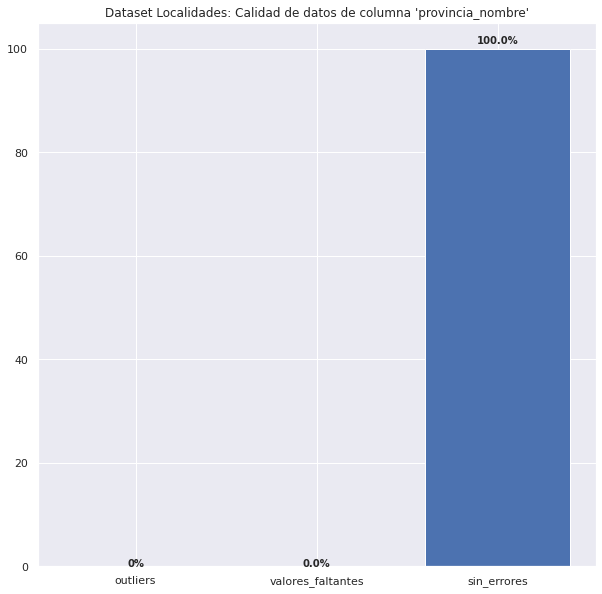

---------------------------------------------------
El porcentaje de valores faltantes en la columna provincia_nombre es : 0.0 %
El porcentaje de outliers en la columna provincia_nombre es : 0 %
El porcentaje de valores sin error en la columna provincia_nombre es : 100.0 %
---------------------------------------------------


In [95]:
analisis_ds(df_localidades,'Localidades')

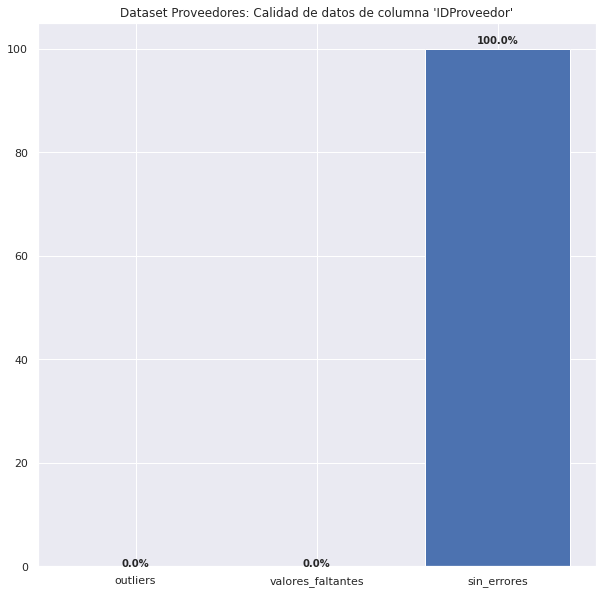

---------------------------------------------------
El porcentaje de valores faltantes en la columna IDProveedor es : 0.0 %
El porcentaje de outliers en la columna IDProveedor es : 0.0 %
El porcentaje de valores sin error en la columna IDProveedor es : 100.0 %
---------------------------------------------------


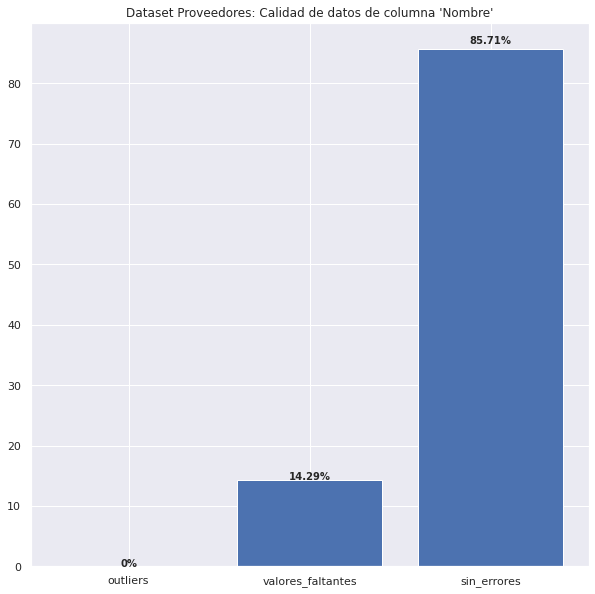

---------------------------------------------------
El porcentaje de valores faltantes en la columna Nombre es : 14.29 %
El porcentaje de outliers en la columna Nombre es : 0 %
El porcentaje de valores sin error en la columna Nombre es : 85.71 %
---------------------------------------------------


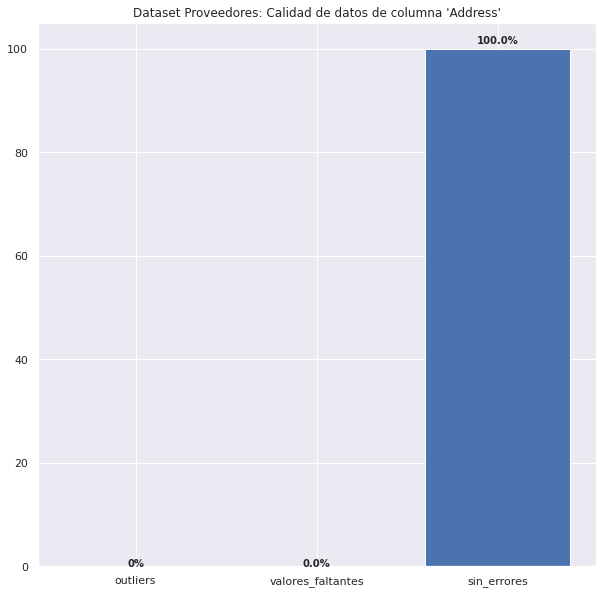

---------------------------------------------------
El porcentaje de valores faltantes en la columna Address es : 0.0 %
El porcentaje de outliers en la columna Address es : 0 %
El porcentaje de valores sin error en la columna Address es : 100.0 %
---------------------------------------------------


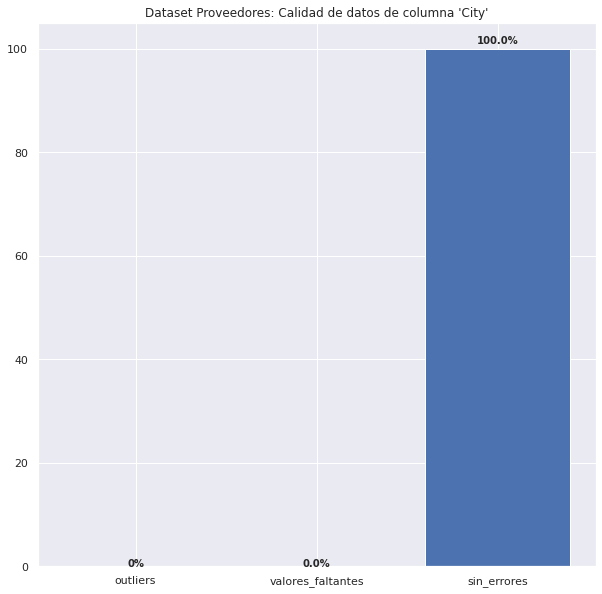

---------------------------------------------------
El porcentaje de valores faltantes en la columna City es : 0.0 %
El porcentaje de outliers en la columna City es : 0 %
El porcentaje de valores sin error en la columna City es : 100.0 %
---------------------------------------------------


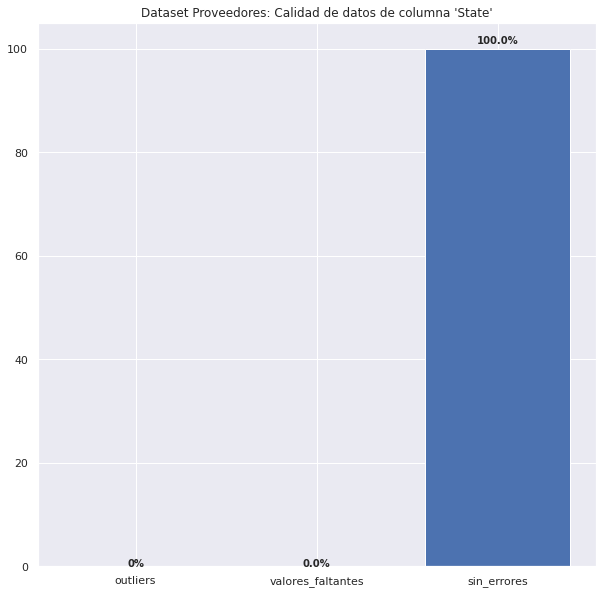

---------------------------------------------------
El porcentaje de valores faltantes en la columna State es : 0.0 %
El porcentaje de outliers en la columna State es : 0 %
El porcentaje de valores sin error en la columna State es : 100.0 %
---------------------------------------------------


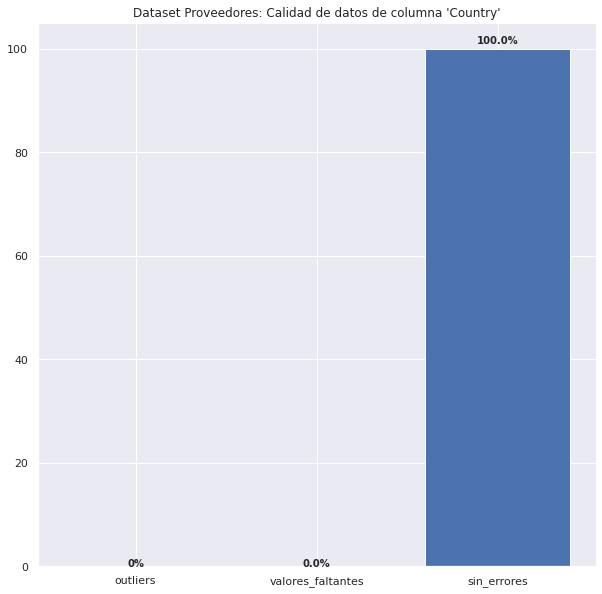

---------------------------------------------------
El porcentaje de valores faltantes en la columna Country es : 0.0 %
El porcentaje de outliers en la columna Country es : 0 %
El porcentaje de valores sin error en la columna Country es : 100.0 %
---------------------------------------------------


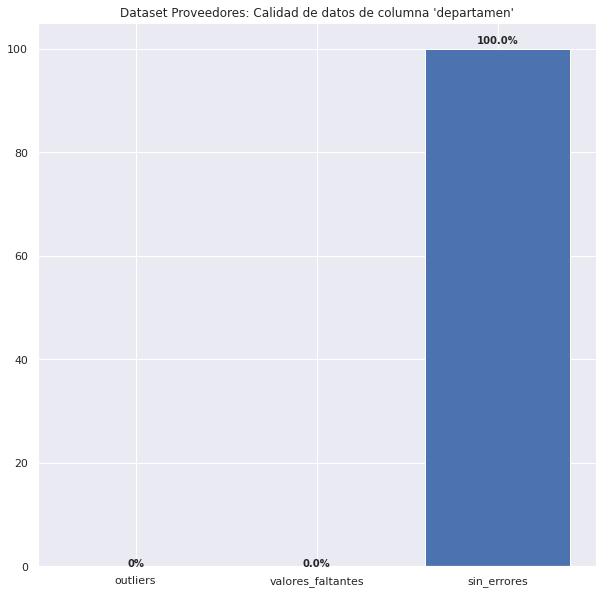

---------------------------------------------------
El porcentaje de valores faltantes en la columna departamen es : 0.0 %
El porcentaje de outliers en la columna departamen es : 0 %
El porcentaje de valores sin error en la columna departamen es : 100.0 %
---------------------------------------------------


In [96]:
analisis_ds(df_proveedores,'Proveedores')

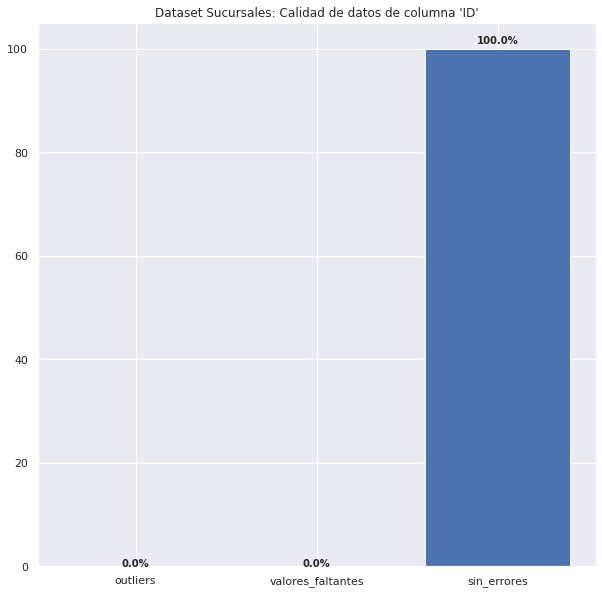

---------------------------------------------------
El porcentaje de valores faltantes en la columna ID es : 0.0 %
El porcentaje de outliers en la columna ID es : 0.0 %
El porcentaje de valores sin error en la columna ID es : 100.0 %
---------------------------------------------------


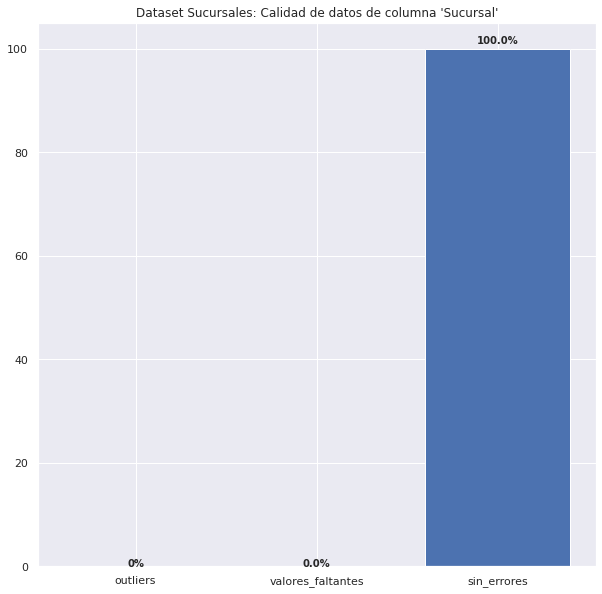

---------------------------------------------------
El porcentaje de valores faltantes en la columna Sucursal es : 0.0 %
El porcentaje de outliers en la columna Sucursal es : 0 %
El porcentaje de valores sin error en la columna Sucursal es : 100.0 %
---------------------------------------------------


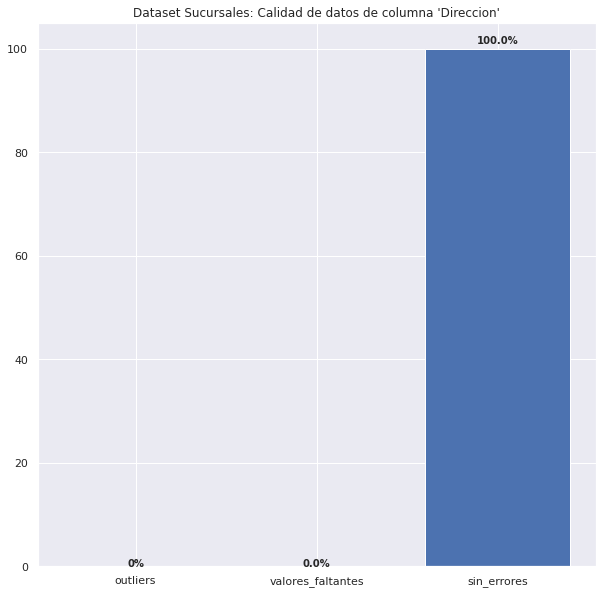

---------------------------------------------------
El porcentaje de valores faltantes en la columna Direccion es : 0.0 %
El porcentaje de outliers en la columna Direccion es : 0 %
El porcentaje de valores sin error en la columna Direccion es : 100.0 %
---------------------------------------------------


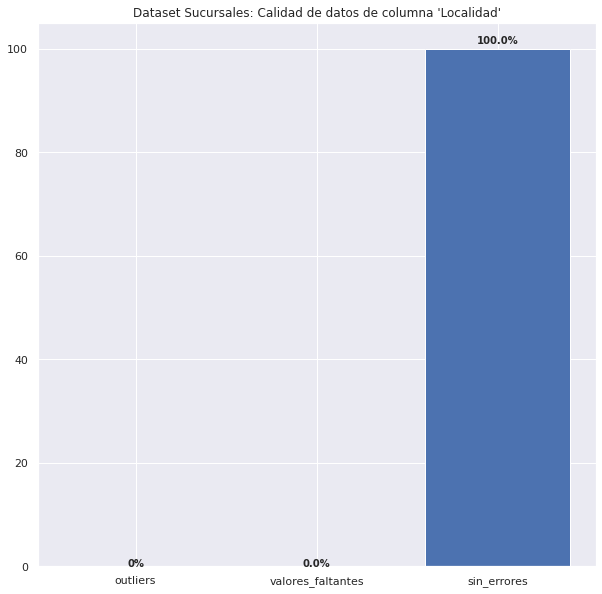

---------------------------------------------------
El porcentaje de valores faltantes en la columna Localidad es : 0.0 %
El porcentaje de outliers en la columna Localidad es : 0 %
El porcentaje de valores sin error en la columna Localidad es : 100.0 %
---------------------------------------------------


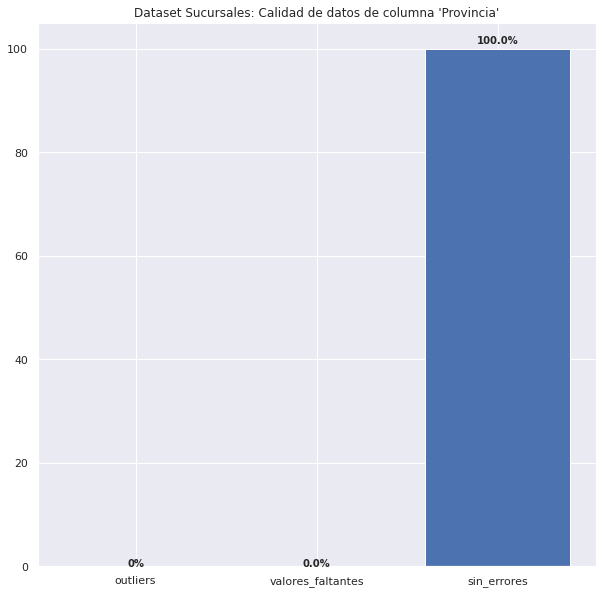

---------------------------------------------------
El porcentaje de valores faltantes en la columna Provincia es : 0.0 %
El porcentaje de outliers en la columna Provincia es : 0 %
El porcentaje de valores sin error en la columna Provincia es : 100.0 %
---------------------------------------------------


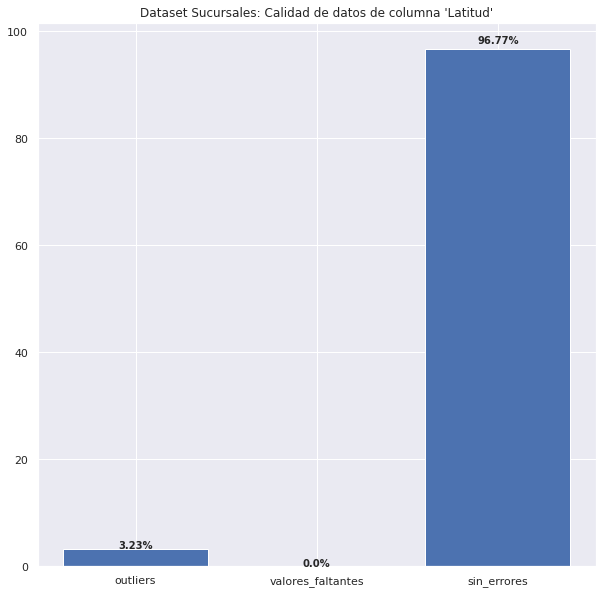

---------------------------------------------------
El porcentaje de valores faltantes en la columna Latitud es : 0.0 %
El porcentaje de outliers en la columna Latitud es : 3.23 %
El porcentaje de valores sin error en la columna Latitud es : 96.77 %
---------------------------------------------------


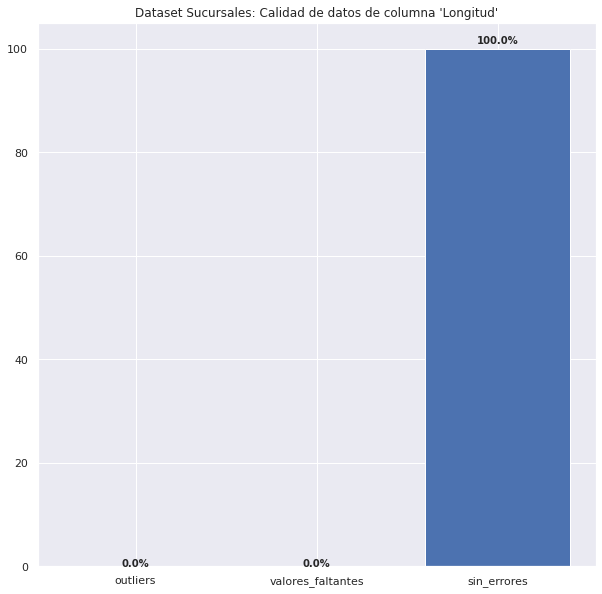

---------------------------------------------------
El porcentaje de valores faltantes en la columna Longitud es : 0.0 %
El porcentaje de outliers en la columna Longitud es : 0.0 %
El porcentaje de valores sin error en la columna Longitud es : 100.0 %
---------------------------------------------------


In [97]:
analisis_ds(df_sucursales,'Sucursales')

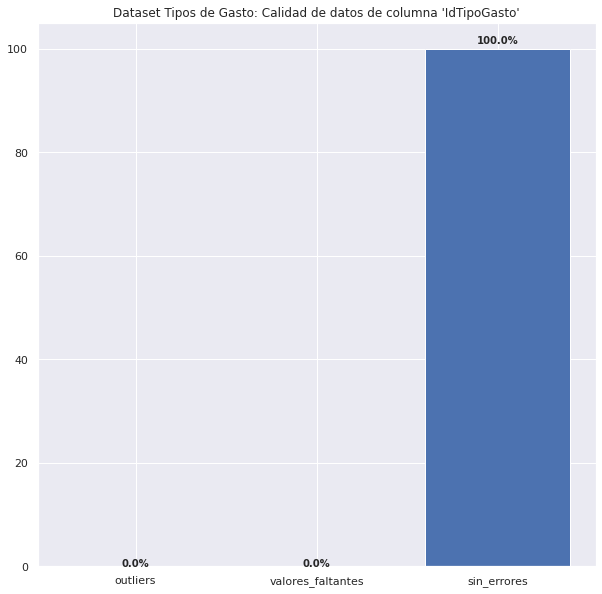

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdTipoGasto es : 0.0 %
El porcentaje de outliers en la columna IdTipoGasto es : 0.0 %
El porcentaje de valores sin error en la columna IdTipoGasto es : 100.0 %
---------------------------------------------------


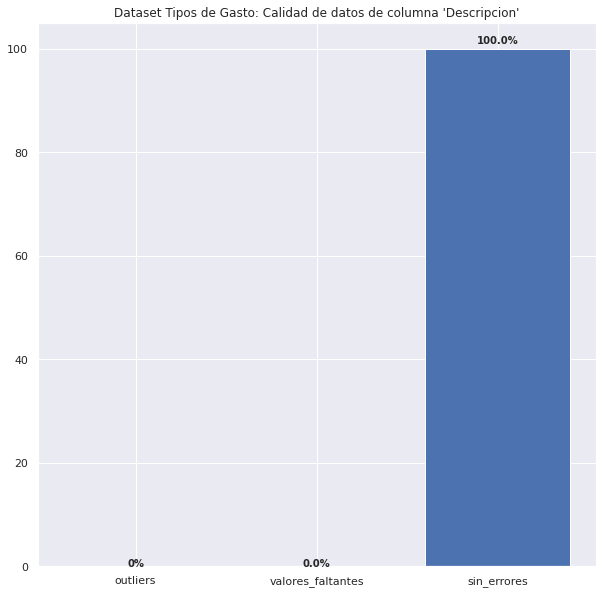

---------------------------------------------------
El porcentaje de valores faltantes en la columna Descripcion es : 0.0 %
El porcentaje de outliers en la columna Descripcion es : 0 %
El porcentaje de valores sin error en la columna Descripcion es : 100.0 %
---------------------------------------------------


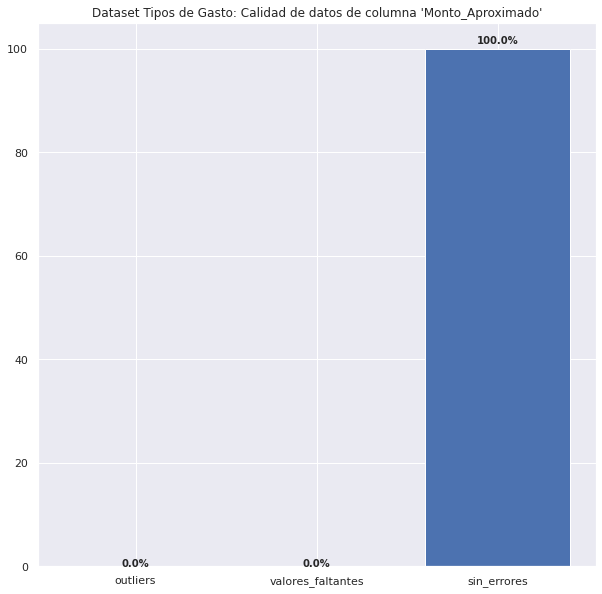

---------------------------------------------------
El porcentaje de valores faltantes en la columna Monto_Aproximado es : 0.0 %
El porcentaje de outliers en la columna Monto_Aproximado es : 0.0 %
El porcentaje de valores sin error en la columna Monto_Aproximado es : 100.0 %
---------------------------------------------------


In [98]:
analisis_ds(df_tipoGasto,'Tipos de Gasto')

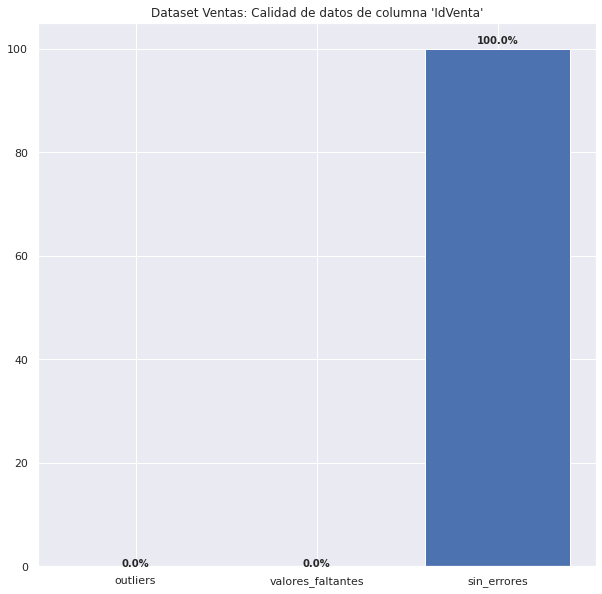

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdVenta es : 0.0 %
El porcentaje de outliers en la columna IdVenta es : 0.0 %
El porcentaje de valores sin error en la columna IdVenta es : 100.0 %
---------------------------------------------------


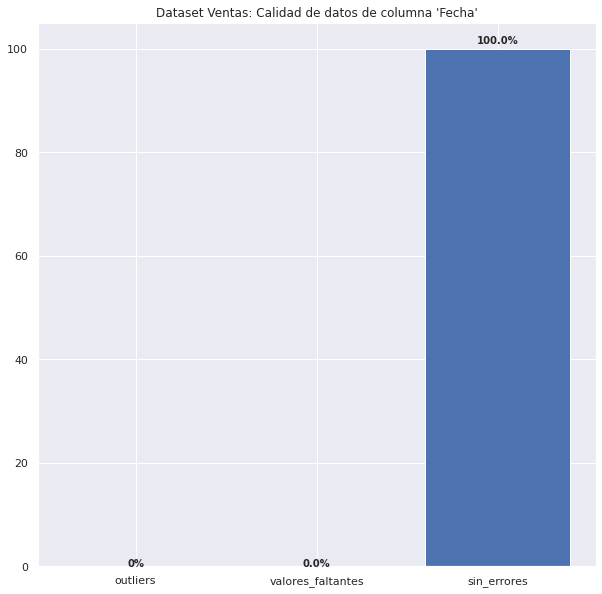

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha es : 0.0 %
El porcentaje de outliers en la columna Fecha es : 0 %
El porcentaje de valores sin error en la columna Fecha es : 100.0 %
---------------------------------------------------


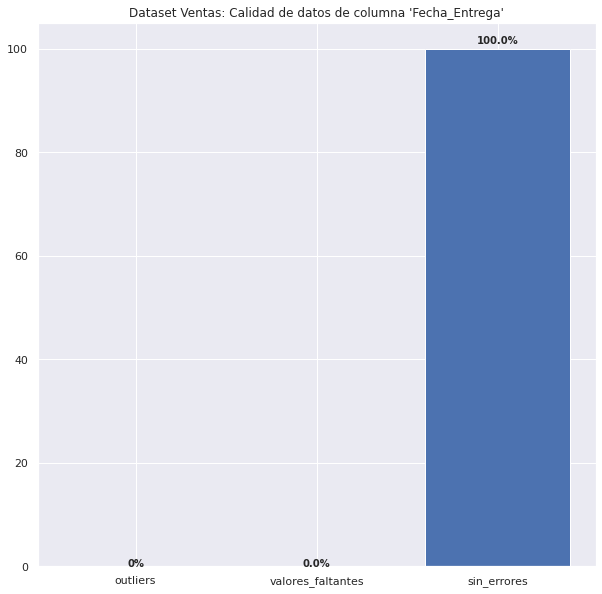

---------------------------------------------------
El porcentaje de valores faltantes en la columna Fecha_Entrega es : 0.0 %
El porcentaje de outliers en la columna Fecha_Entrega es : 0 %
El porcentaje de valores sin error en la columna Fecha_Entrega es : 100.0 %
---------------------------------------------------


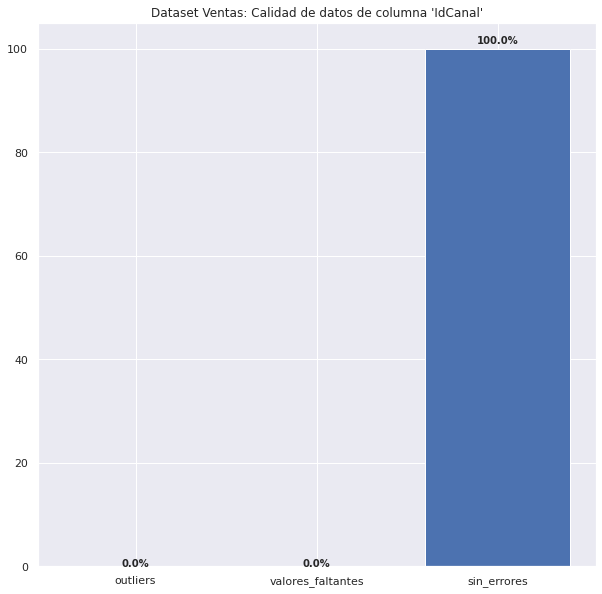

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdCanal es : 0.0 %
El porcentaje de outliers en la columna IdCanal es : 0.0 %
El porcentaje de valores sin error en la columna IdCanal es : 100.0 %
---------------------------------------------------


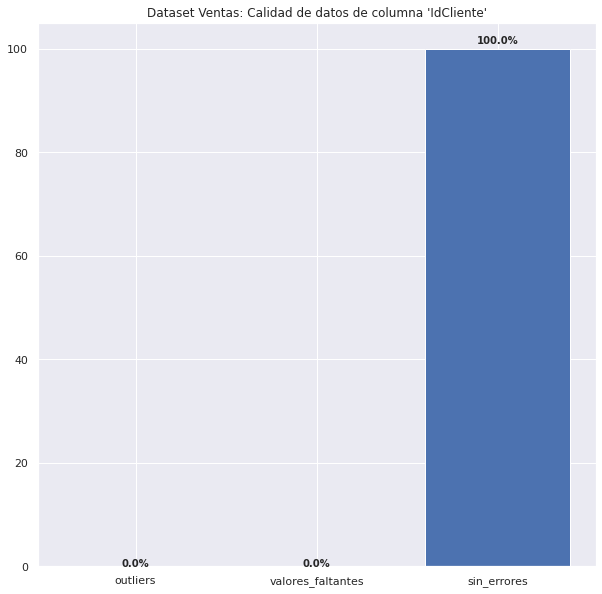

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdCliente es : 0.0 %
El porcentaje de outliers en la columna IdCliente es : 0.0 %
El porcentaje de valores sin error en la columna IdCliente es : 100.0 %
---------------------------------------------------


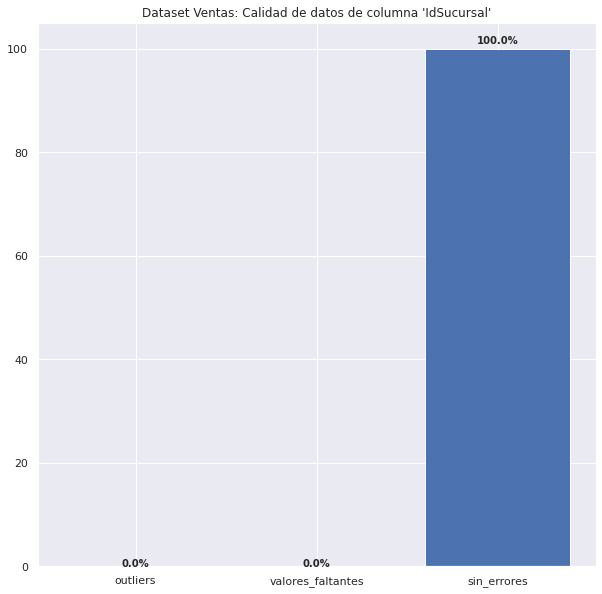

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdSucursal es : 0.0 %
El porcentaje de outliers en la columna IdSucursal es : 0.0 %
El porcentaje de valores sin error en la columna IdSucursal es : 100.0 %
---------------------------------------------------


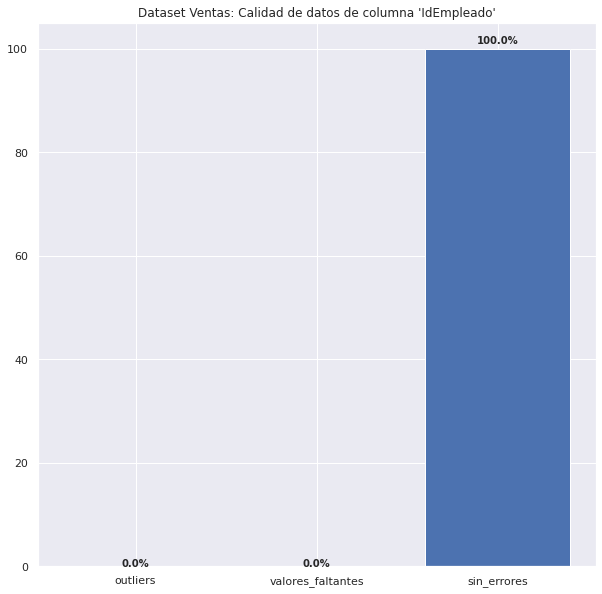

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdEmpleado es : 0.0 %
El porcentaje de outliers en la columna IdEmpleado es : 0.0 %
El porcentaje de valores sin error en la columna IdEmpleado es : 100.0 %
---------------------------------------------------


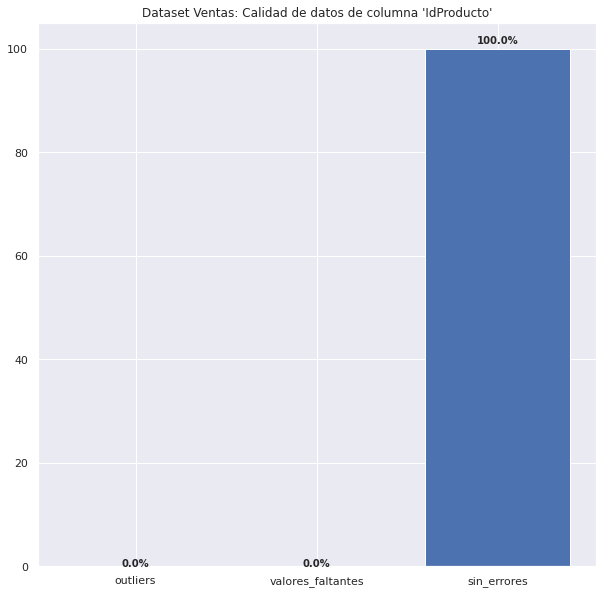

---------------------------------------------------
El porcentaje de valores faltantes en la columna IdProducto es : 0.0 %
El porcentaje de outliers en la columna IdProducto es : 0.0 %
El porcentaje de valores sin error en la columna IdProducto es : 100.0 %
---------------------------------------------------


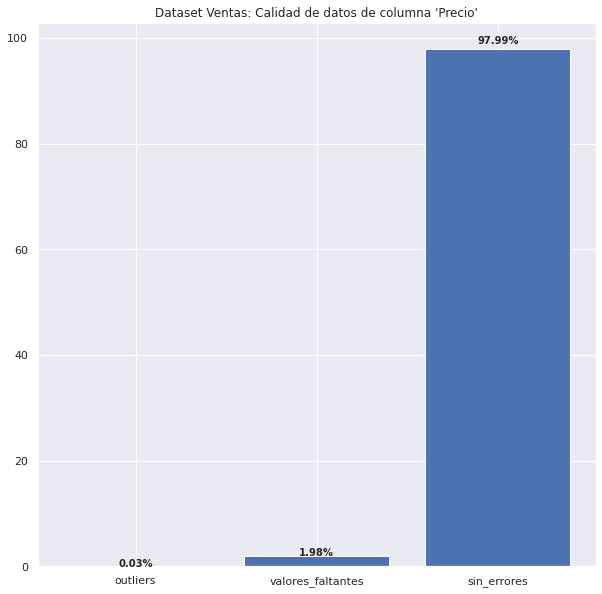

---------------------------------------------------
El porcentaje de valores faltantes en la columna Precio es : 1.98 %
El porcentaje de outliers en la columna Precio es : 0.03 %
El porcentaje de valores sin error en la columna Precio es : 97.99 %
---------------------------------------------------


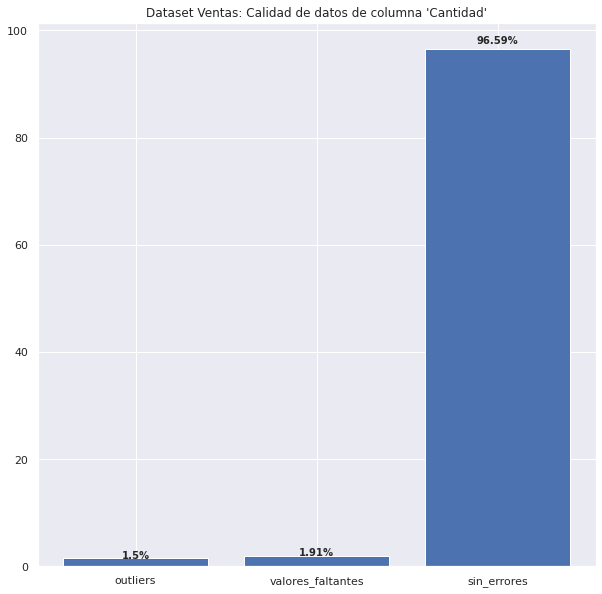

---------------------------------------------------
El porcentaje de valores faltantes en la columna Cantidad es : 1.91 %
El porcentaje de outliers en la columna Cantidad es : 1.5 %
El porcentaje de valores sin error en la columna Cantidad es : 96.59 %
---------------------------------------------------


In [99]:
analisis_ds(df_ventas,'Ventas')

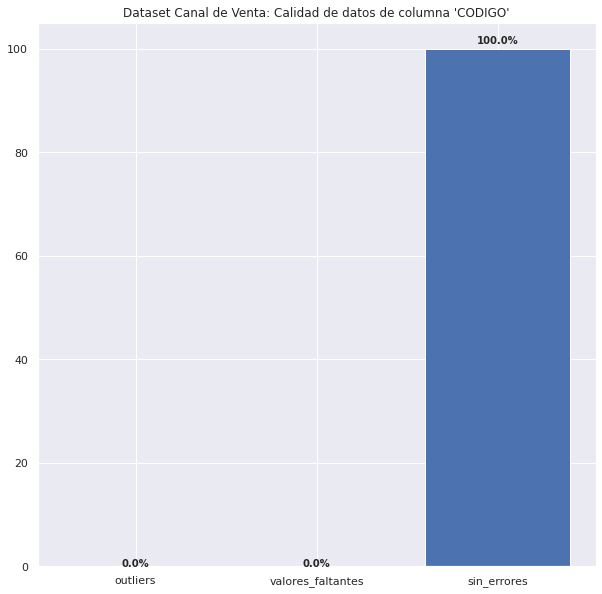

---------------------------------------------------
El porcentaje de valores faltantes en la columna CODIGO es : 0.0 %
El porcentaje de outliers en la columna CODIGO es : 0.0 %
El porcentaje de valores sin error en la columna CODIGO es : 100.0 %
---------------------------------------------------


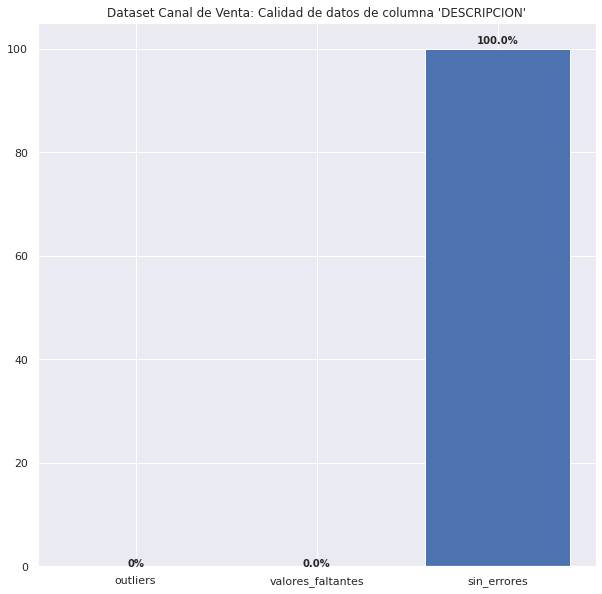

---------------------------------------------------
El porcentaje de valores faltantes en la columna DESCRIPCION es : 0.0 %
El porcentaje de outliers en la columna DESCRIPCION es : 0 %
El porcentaje de valores sin error en la columna DESCRIPCION es : 100.0 %
---------------------------------------------------


In [100]:
analisis_ds(df_canalVenta,'Canal de Venta')

# Funcion para normalizar Datasets

In [34]:
class normalizar_dataFrame:
    def __init__(self):
        return None
    def eliminar_columna_vacia(self,df): 
        for i in df:
            columna_vacia = 0
            columna_vacia = df[i].isnull().sum()/df.shape[0]
            if columna_vacia == 1:
                df.drop(columns=i,inplace=True)

    def normalizar_strings(self,df):
        for i in df:
            if df[i].dtype == 'O':
                df[i] = df[i].str.title()

    def llenar_nulos(self,df):
        for i in df:
            if df[i].dtype == 'O':
                df[i] = df[i].fillna('Sin datos')
            else:
                df[i] = df[i].fillna(0)

    def eliminar_duplicados(self,df):
        for i in df:
            df[i].drop_duplicates(inplace=True)
    
    def transformar_datos(self,df):
        if df == df_clientes:
            df['X'][df.X > 0] = df['X'][df.X > 0] * -1
            df['Y'][df.Y > 0] = df['Y'][df.Y > 0] * -1

            df['Longitud'] = df['Y']
            df['Latitud'] = df['X']
            df.drop(columns=['X','Y'],inplace=True)
            df['Rango_Etario'] = '-'
            df['Rango_Etario'][df.Edad <= 30] = '1_Hasta 30 años'
            df['Rango_Etario'][(df.Edad <= 40) & (df.Rango_Etario == '-')] = '2_De 31 a 40 años'
            df['Rango_Etario'][(df.Edad <= 50) & (df.Rango_Etario == '-')] = '3_De 41 a 50 años'
            df['Rango_Etario'][(df.Edad <= 60) & (df.Rango_Etario == '-')] = '4_De 51 a 60 años'
            df['Rango_Etario'][(df.Edad > 60) & (df.Rango_Etario == '-')] = '5_Desde 60 años'
        
        elif df==df_compra:
            df.drop(columns=['Fecha_Año','Fecha_Mes','Fecha_Periodo'],inplace=True)

            df['Fecha'] = pd.to_datetime(df['Fecha'])


        elif df==df_gasto:
            df['Fecha'] = pd.to_datetime(df['Fecha'])


        elif df==df_localidades:
            df.rename(columns={'centroide_lon':'Longitud','centroide_lat':'Latitud'},inplace=True)

        
        elif df==df_proveedores:
            df.rename(columns={'Address':'Domicilio','City':'Ciudad','State':'Provincia','Country':'Pais','departamen':'Localidad'},inplace=True)

            df.Ciudad = df['Ciudad'].str.capitalize()
            df.Provincia = df['Provincia'].str.capitalize()
            df.Pais = df['Pais'].str.capitalize()
            df.Localidad = df['Localidad'].str.capitalize()

        elif df==df_proveedores:
           pass
        
        elif df==df_tipoGasto:
           pass
        elif df==df_ventas:
            pass
        elif df==df_canalVenta:
            df.rename(columns={"CODIGO":"IdCanal","DESCRIPCION":"Canal"},inplace=True)
            df.set_index("IdCanal",inplace=True)

        return df
